In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import time # to measure how long the models take
from sklearn import datasets
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Import Data

In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [42]:
data = pd.read_csv('https://raw.githubusercontent.com/lilfakeS/schulich_data_science/main/Customer_Data%202.csv')

# Data pre-processing

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [44]:
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [45]:
data = data.dropna()

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8636 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8636 non-null   object 
 1   BALANCE                           8636 non-null   float64
 2   BALANCE_FREQUENCY                 8636 non-null   float64
 3   PURCHASES                         8636 non-null   float64
 4   ONEOFF_PURCHASES                  8636 non-null   float64
 5   INSTALLMENTS_PURCHASES            8636 non-null   float64
 6   CASH_ADVANCE                      8636 non-null   float64
 7   PURCHASES_FREQUENCY               8636 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 11  CASH_ADVANCE_TRX                  8636 non-null   int64  
 12  PURCHASES_T

In [47]:
data= data.drop('CUST_ID',axis=1)

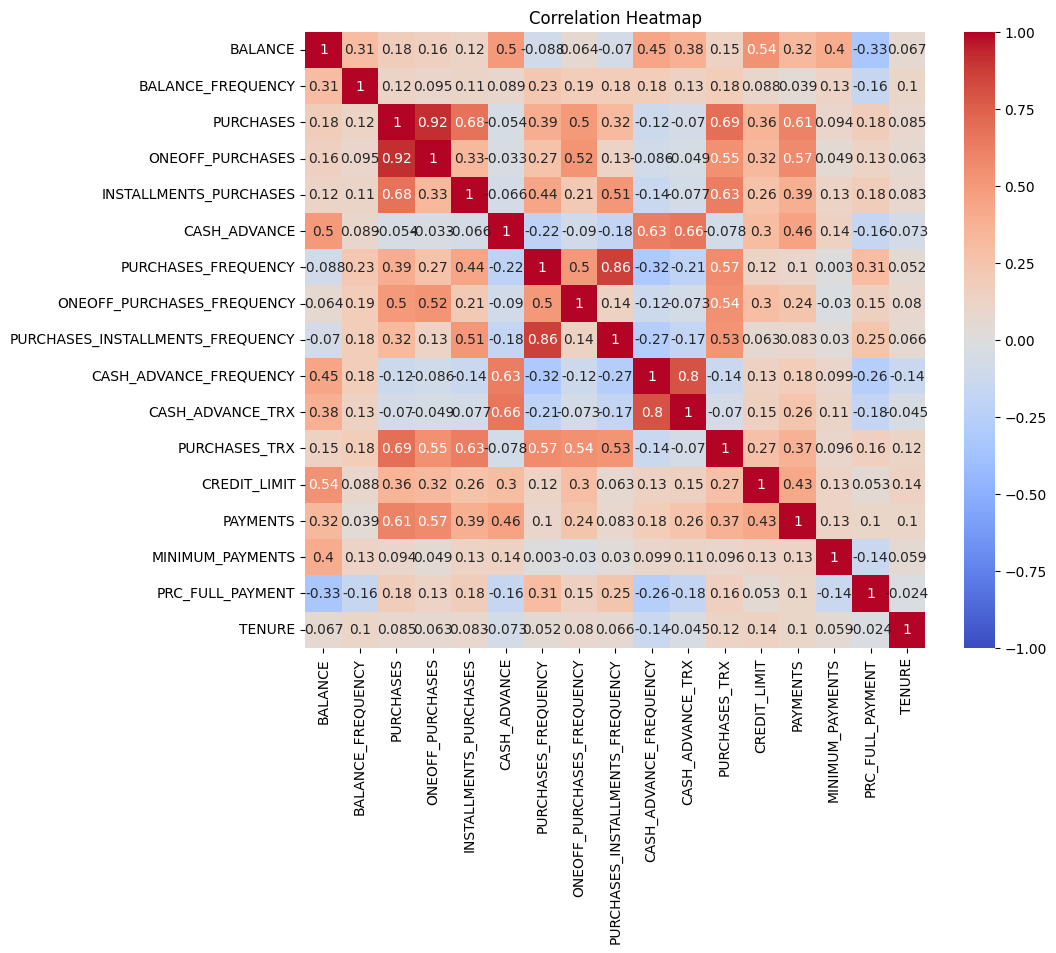

In [48]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

### Drop high correlated variables

In [62]:
newdata = data.drop('ONEOFF_PURCHASES',axis=1)
newdata1 = newdata.drop('PURCHASES_INSTALLMENTS_FREQUENCY',axis=1)
newdata2 = newdata1.drop('CASH_ADVANCE_TRX',axis=1)

In [63]:
newdata2

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,95.40,0.000000,0.166667,0.000000,0.000000,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,6442.945483,0.000000,0.000000,0.250000,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,0.00,0.000000,1.000000,1.000000,0.000000,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,0.00,0.000000,0.083333,0.083333,0.000000,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,1333.28,0.000000,0.666667,0.000000,0.000000,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,5.871712,0.500000,20.90,0.00,0.000000,0.166667,0.166667,0.000000,1,500.0,58.644883,43.473717,0.000000,6
8945,28.493517,1.000000,291.12,291.12,0.000000,1.000000,0.000000,0.000000,6,1000.0,325.594462,48.886365,0.500000,6
8947,23.398673,0.833333,144.40,144.40,0.000000,0.833333,0.000000,0.000000,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,36.558778,0.000000,0.000000,0.166667,0,500.0,52.549959,55.755628,0.250000,6


First, I checked the data format and missing values. The data has about 300 missing values which are way more less than 10% of the whole dataset. Thus, I simply remove all rows that have missing values. And I droped the CUST_ID column to ckeck the correletion index of each column. I found that ONEOFF_PURCHASES is highly correlated with PURCHASES, and PURCHASES_INSTALLMENTS_FREQUENCY is highly correlated with PURCHASES_FREQUENCY. This represent the oneoff purchases amount takes a big portion of the total purchase amount, and most of purchase are made from installemts. Also, CASH_ADVANCE_TRX is highly correlated with CASH_ADVANCE_FREQUENCY, these teo variables are generally the same thing. Thus, we only have to keep one of each variables in order to avoid redundent data to affec the cluster results.

# EDA

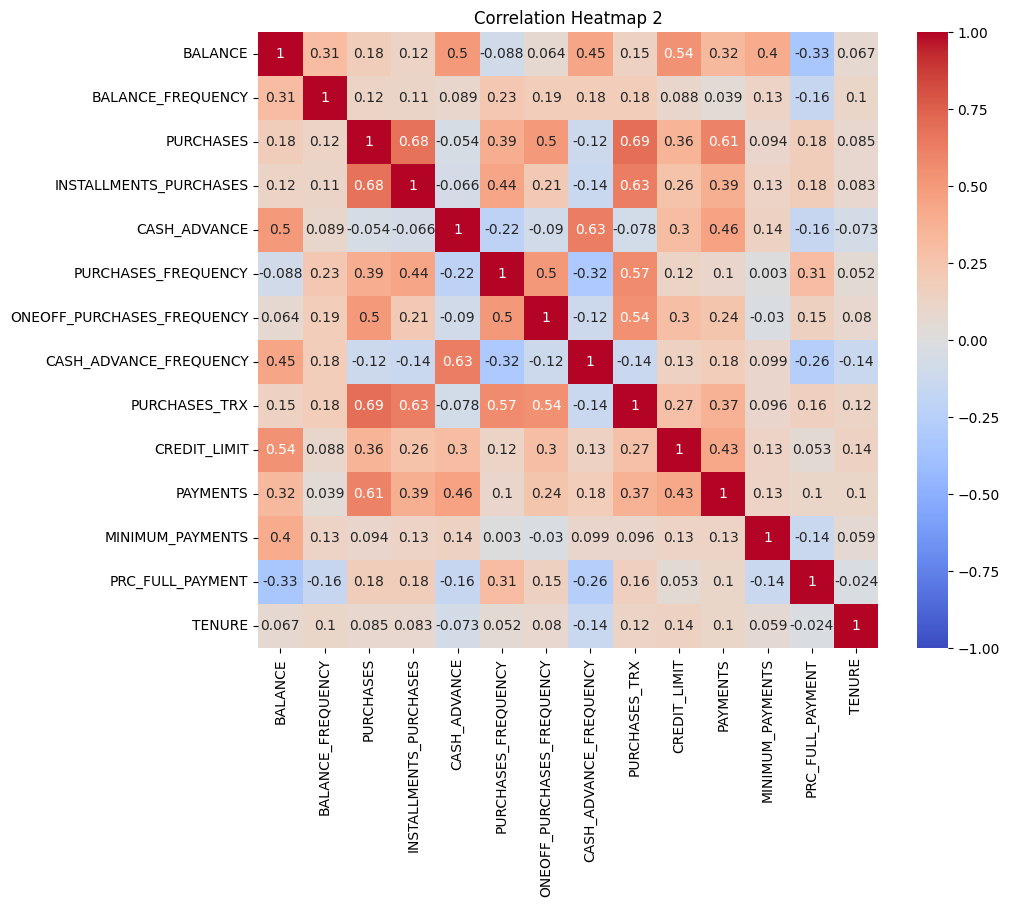

In [65]:
correlation_matrix_2 = newdata2.corr()
plt.figure(figsize=(10, 8))  
sns.heatmap(correlation_matrix_2, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap 2')
plt.show()

<Axes: xlabel='BALANCE', ylabel='BALANCE_FREQUENCY'>

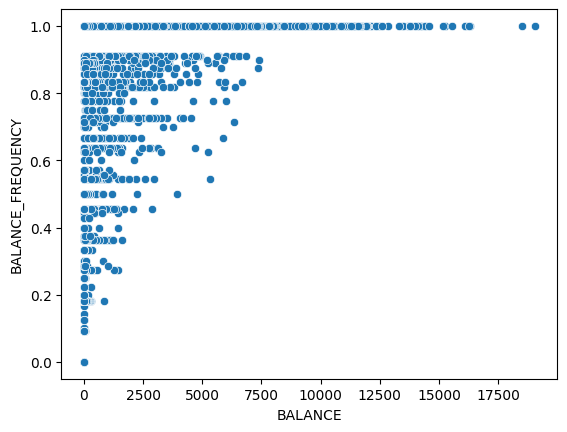

In [33]:
sns.scatterplot(data = newdata2, x = 'BALANCE', y = 'BALANCE_FREQUENCY')

<Axes: xlabel='BALANCE_FREQUENCY', ylabel='Count'>

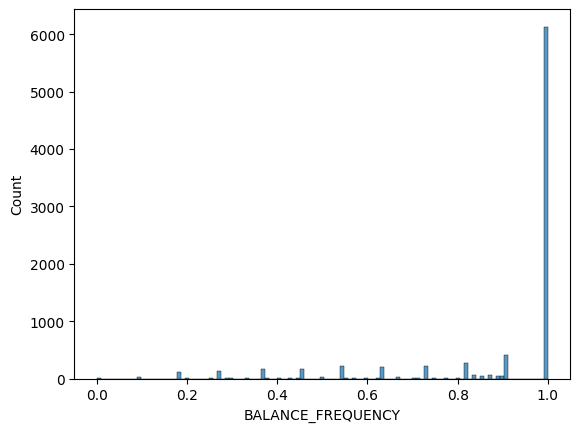

In [180]:
sns.histplot(newdata2['BALANCE_FREQUENCY'])

<Axes: xlabel='BALANCE', ylabel='PURCHASES'>

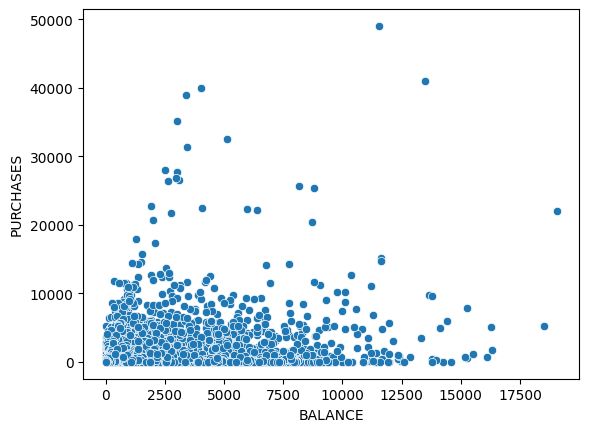

In [66]:
sns.scatterplot(data = newdata2, x = 'BALANCE', y = 'PURCHASES')

<Axes: xlabel='BALANCE', ylabel='Count'>

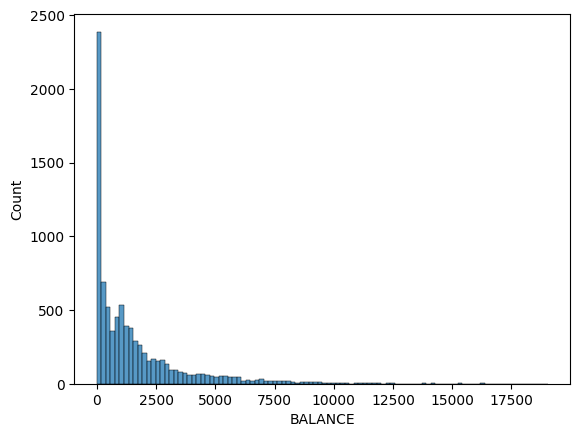

In [67]:
sns.histplot(newdata2['BALANCE'])

<Axes: xlabel='PURCHASES_FREQUENCY', ylabel='Count'>

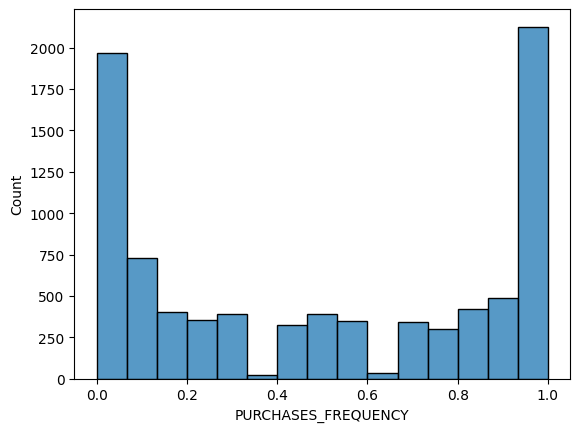

In [69]:
sns.histplot(newdata2['PURCHASES_FREQUENCY'])

<Axes: xlabel='CREDIT_LIMIT', ylabel='Count'>

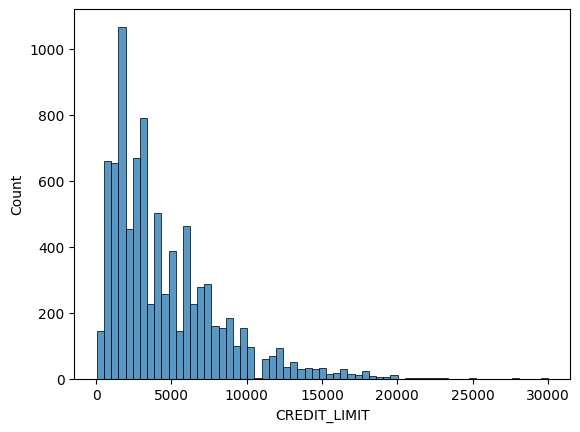

In [71]:
sns.histplot(newdata2['CREDIT_LIMIT'])

<Axes: xlabel='TENURE', ylabel='Count'>

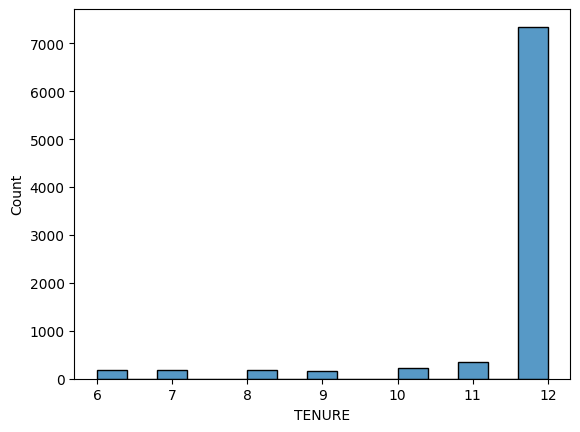

In [72]:
sns.histplot(newdata2['TENURE'])

In the EDA process, I found the data is highly unorganized.  
Most of the users have balance frequency of 1, and the distribution is not highly related to balance in thier accounts.  
But higher balance will bring higher purchases amount. However, the purchases frequency shows many people are tend to have extreamly low frequency of purchase, or high frequency of purchase.  
Most of people have credit limit less than $5000, and most of users are having tenure of 12 which means they are old users.
And this helped me to understand why many people do not make many purchases because they are old users, so they may have more than 1 credit card and this is the card they do not usually use.

# Clustering Algorithms

### K-means

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

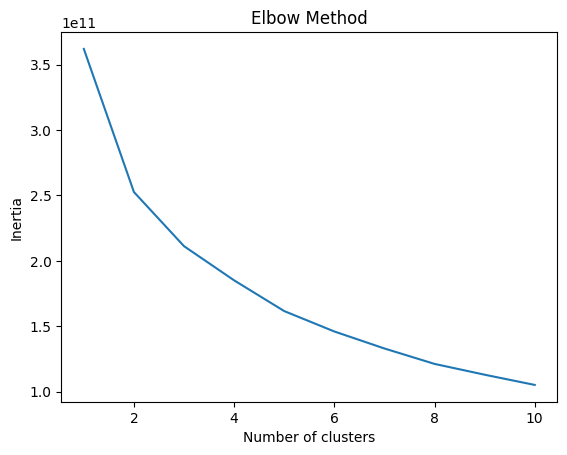

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

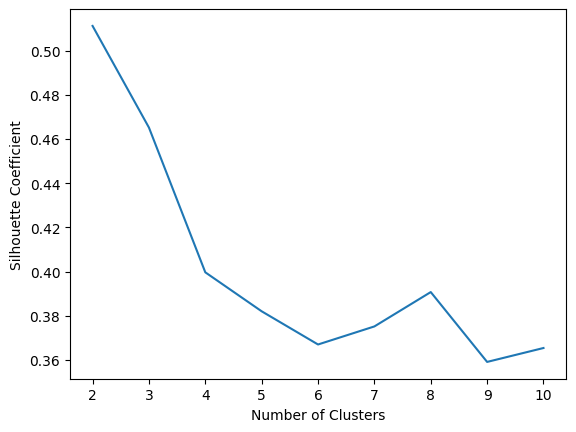

In [107]:
# Elbow Method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(newdata2)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# silhouette score
silhouette_coeffecients = []
for j in range (2,11):
    kmeans = KMeans(n_clusters = j)
    kmeans.fit(newdata2)
    score = silhouette_score(newdata2, kmeans.labels_)
    silhouette_coeffecients.append(score)


plt.plot(range(2,11), silhouette_coeffecients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [145]:
# Applying K-means with 2 clusters
kmeans = KMeans(n_clusters=2,random_state=1)
kmeans.fit(newdata2)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Silhouette Score
sil_score = silhouette_score(newdata2, labels)
print(f"Silhouette Score: {sil_score}")


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.5113685791145212


<Axes: xlabel='BALANCE', ylabel='PURCHASES'>

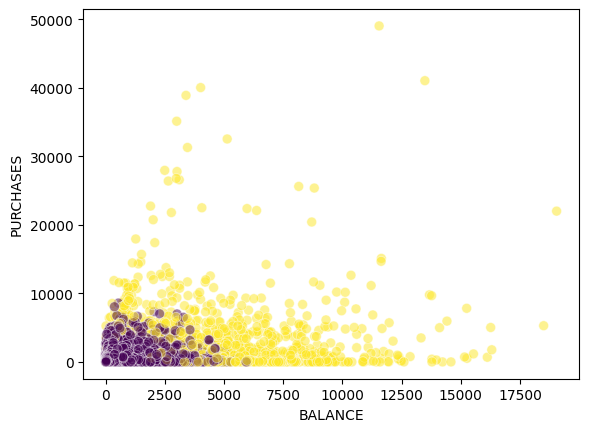

In [146]:
sns.scatterplot(data = newdata2, x = 'BALANCE', y = 'PURCHASES', c= kmeans.labels_.astype(float), s=50, alpha=0.5)

<Axes: xlabel='BALANCE', ylabel='BALANCE_FREQUENCY'>

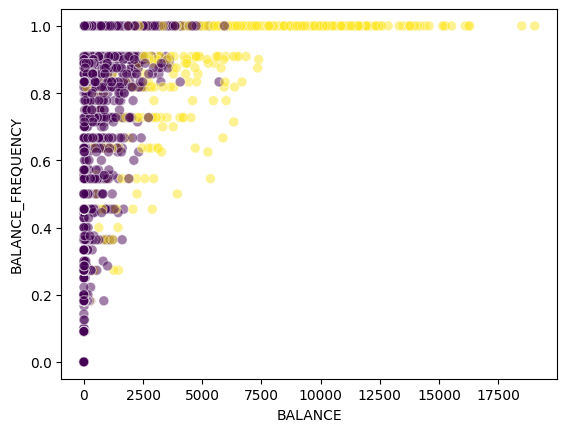

In [147]:
sns.scatterplot(data = newdata2, x = 'BALANCE', y = 'BALANCE_FREQUENCY', c= kmeans.labels_.astype(float), s=50, alpha=0.5)

<Axes: xlabel='BALANCE', ylabel='INSTALLMENTS_PURCHASES'>

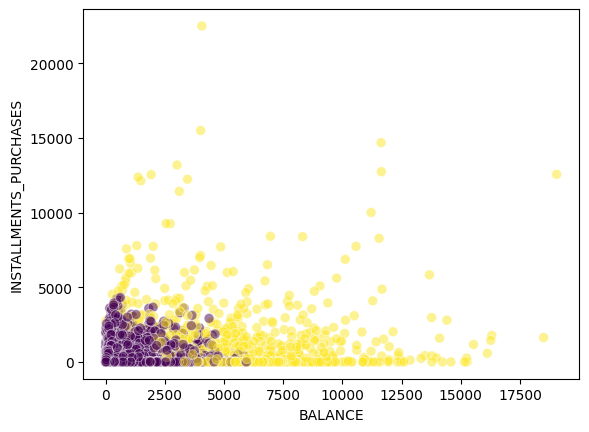

In [148]:
sns.scatterplot(data = newdata2, x = 'BALANCE', y = 'INSTALLMENTS_PURCHASES', c= kmeans.labels_.astype(float), s=50, alpha=0.5)

<Axes: xlabel='BALANCE', ylabel='CASH_ADVANCE'>

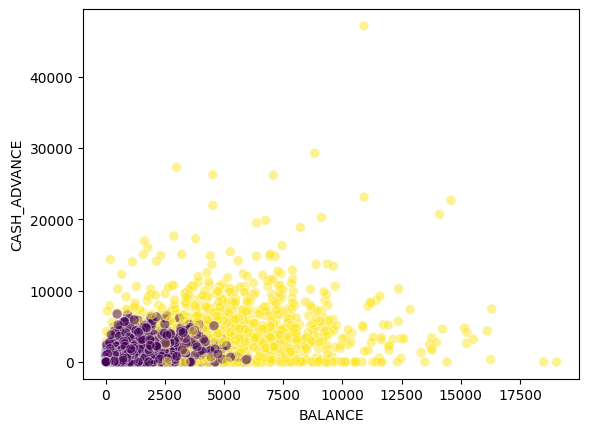

In [149]:
sns.scatterplot(data = newdata2, x = 'BALANCE', y = 'CASH_ADVANCE', c= kmeans.labels_.astype(float), s=50, alpha=0.5)

<Axes: xlabel='INSTALLMENTS_PURCHASES', ylabel='PURCHASES'>

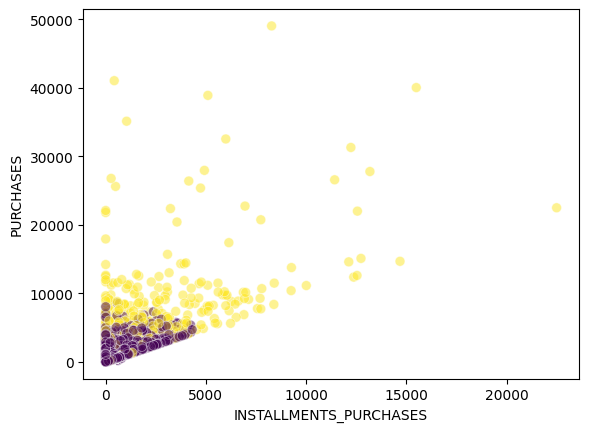

In [150]:
sns.scatterplot(data = newdata2, x = 'INSTALLMENTS_PURCHASES', y = 'PURCHASES', c= kmeans.labels_.astype(float), s=50, alpha=0.5)

<Axes: xlabel='BALANCE', ylabel='CREDIT_LIMIT'>

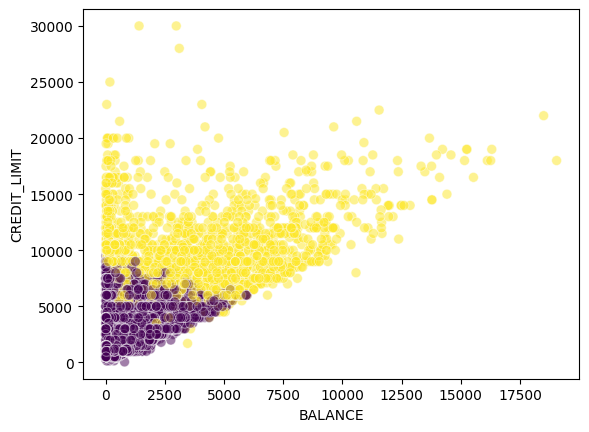

In [151]:
sns.scatterplot(data = newdata2, x = 'BALANCE', y = 'CREDIT_LIMIT', c= kmeans.labels_.astype(float), s=50, alpha=0.5)


<Axes: xlabel='BALANCE', ylabel='MINIMUM_PAYMENTS'>

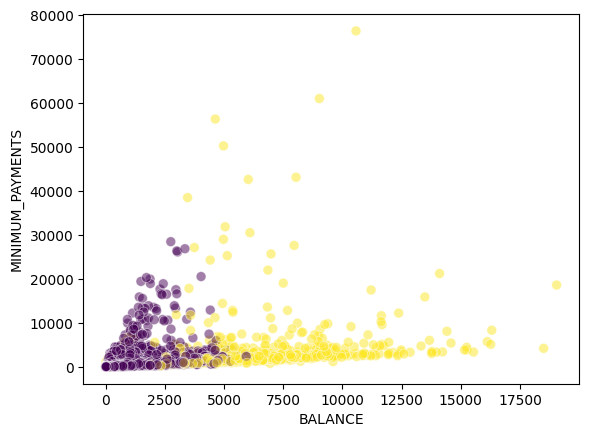

In [152]:
sns.scatterplot(data = newdata2, x = 'BALANCE', y = 'MINIMUM_PAYMENTS', c= kmeans.labels_.astype(float), s=50, alpha=0.5)

<Axes: xlabel='BALANCE', ylabel='PRC_FULL_PAYMENT'>

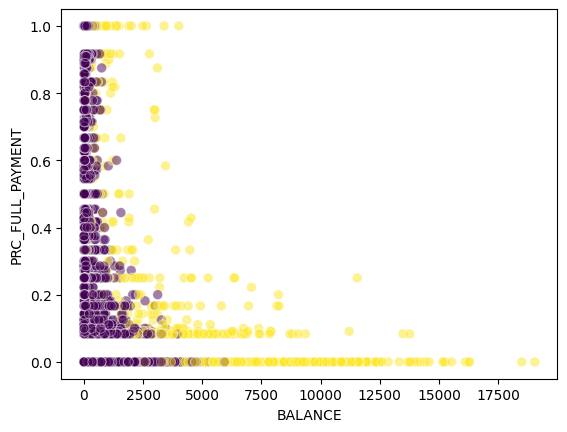

In [153]:
sns.scatterplot(data = newdata2, x = 'BALANCE', y = 'PRC_FULL_PAYMENT', c= kmeans.labels_.astype(float), s=50, alpha=0.5)

<Axes: xlabel='BALANCE', ylabel='TENURE'>

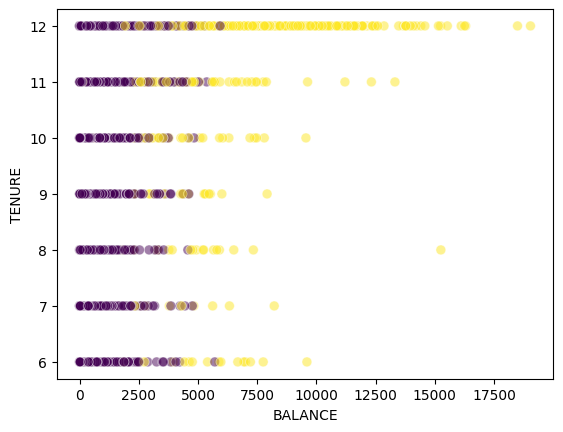

In [154]:
sns.scatterplot(data = newdata2, x = 'BALANCE', y = 'TENURE', c= kmeans.labels_.astype(float), s=50, alpha=0.5)

### Affinity Propagation

In [126]:
# Importing required library
from sklearn.cluster import AffinityPropagation

# Applying Affinity Propagation
af = AffinityPropagation(random_state=0)
af_labels = af.fit_predict(newdata2)

# Silhouette Score
af_sil_score = silhouette_score(newdata2, af_labels)
print(f"Affinity Propagation Silhouette Score: {af_sil_score}")

Affinity Propagation Silhouette Score: 0.20592367295770925


<Axes: xlabel='BALANCE', ylabel='PURCHASES'>

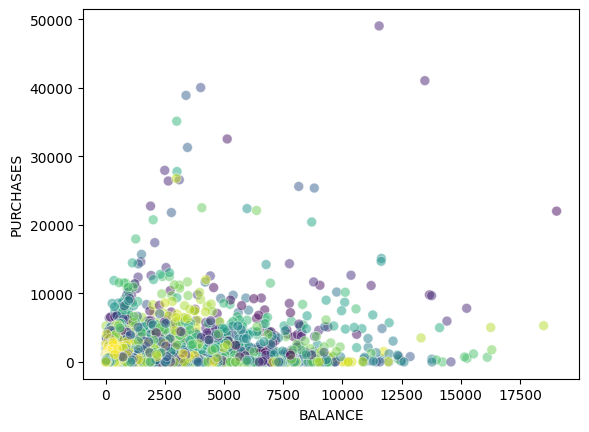

In [127]:
sns.scatterplot(data = newdata2, x = 'BALANCE', y = 'PURCHASES', c= af.labels_.astype(float), s=50, alpha=0.5)

<Axes: xlabel='BALANCE', ylabel='BALANCE_FREQUENCY'>

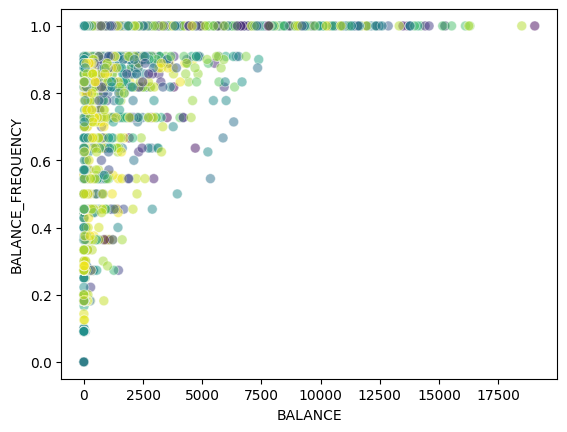

In [128]:
sns.scatterplot(data = newdata2, x = 'BALANCE', y = 'BALANCE_FREQUENCY', c= af.labels_.astype(float), s=50, alpha=0.5)

<Axes: xlabel='BALANCE', ylabel='INSTALLMENTS_PURCHASES'>

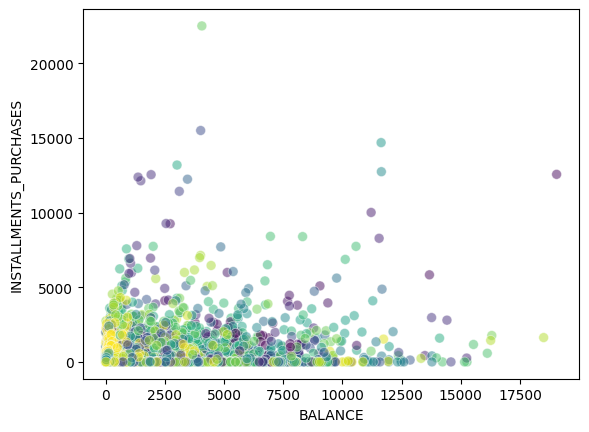

In [129]:
sns.scatterplot(data = newdata2, x = 'BALANCE', y = 'INSTALLMENTS_PURCHASES', c= af.labels_.astype(float), s=50, alpha=0.5)

<Axes: xlabel='BALANCE', ylabel='CASH_ADVANCE'>

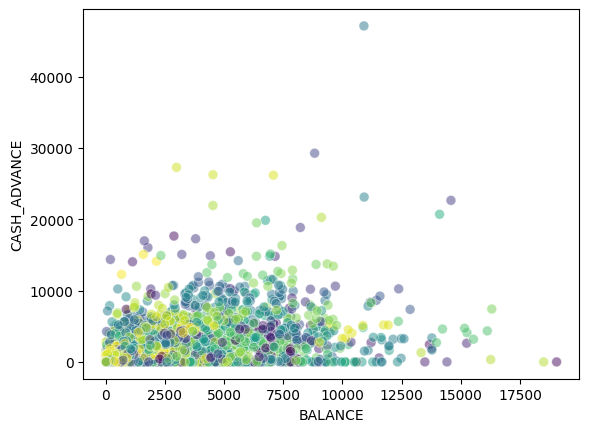

In [132]:
sns.scatterplot(data = newdata2, x = 'BALANCE', y = 'CASH_ADVANCE', c= af.labels_.astype(float), s=50, alpha=0.5)

<Axes: xlabel='INSTALLMENTS_PURCHASES', ylabel='PURCHASES'>

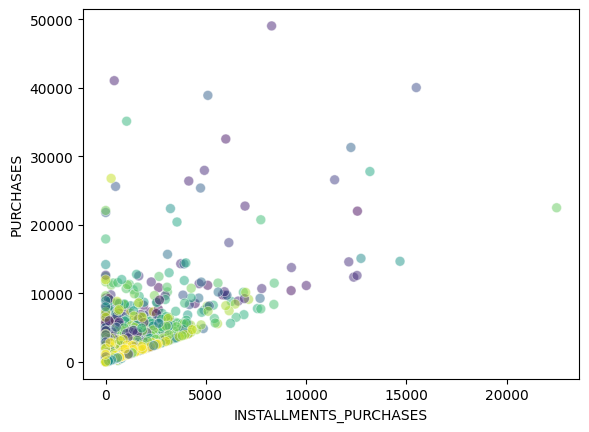

In [133]:
sns.scatterplot(data = newdata2, x = 'INSTALLMENTS_PURCHASES', y = 'PURCHASES', c= af.labels_.astype(float), s=50, alpha=0.5)

<Axes: xlabel='BALANCE', ylabel='CREDIT_LIMIT'>

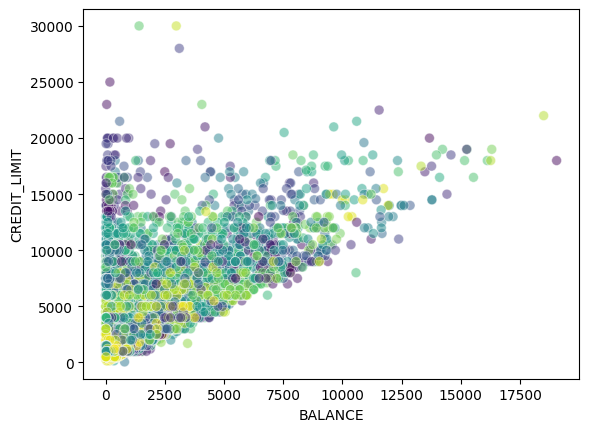

In [134]:
sns.scatterplot(data = newdata2, x = 'BALANCE', y = 'CREDIT_LIMIT', c= af.labels_.astype(float), s=50, alpha=0.5)

<Axes: xlabel='BALANCE', ylabel='MINIMUM_PAYMENTS'>

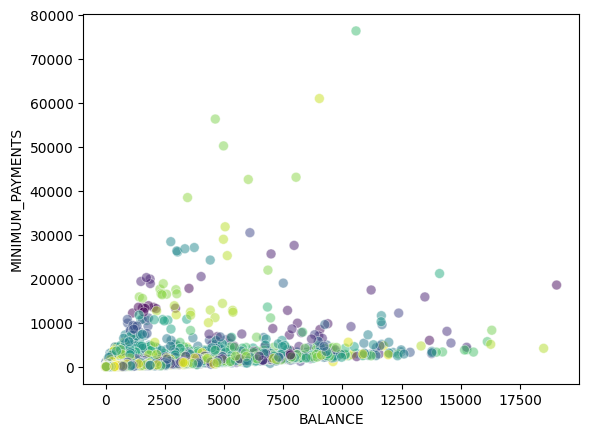

In [135]:
sns.scatterplot(data = newdata2, x = 'BALANCE', y = 'MINIMUM_PAYMENTS', c= af.labels_.astype(float), s=50, alpha=0.5)

<Axes: xlabel='BALANCE', ylabel='PRC_FULL_PAYMENT'>

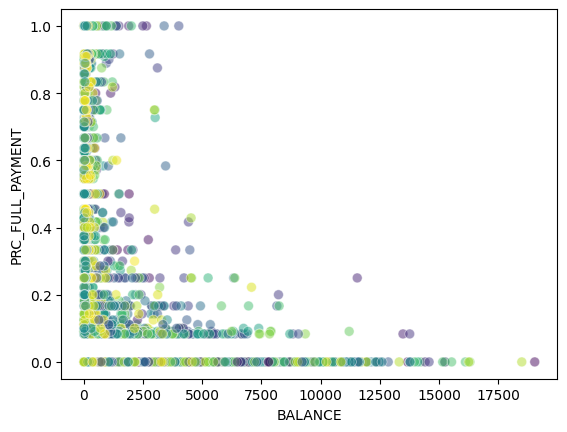

In [136]:
sns.scatterplot(data = newdata2, x = 'BALANCE', y = 'PRC_FULL_PAYMENT', c= af.labels_.astype(float), s=50, alpha=0.5)

<Axes: xlabel='BALANCE', ylabel='TENURE'>

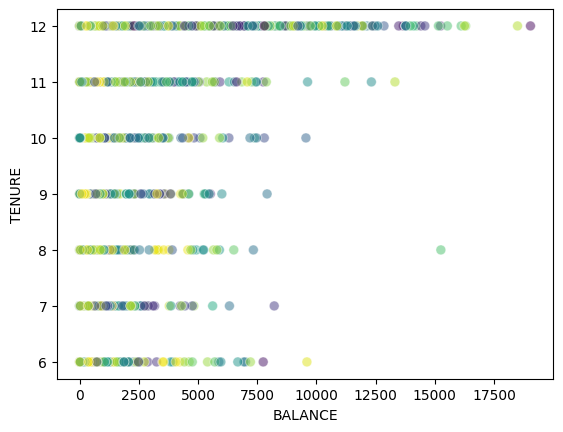

In [137]:
sns.scatterplot(data = newdata2, x = 'BALANCE', y = 'TENURE', c= af.labels_.astype(float), s=50, alpha=0.5)

### Mean Shift

In [165]:
# Importing required library
from sklearn.cluster import MeanShift

# Applying Mean Shift
ms = MeanShift(bandwidth=2).fit(newdata2)

# Silhouette Score
ms_sil_score = silhouette_score(newdata2, af_labels)
print(f"Mean Shift Silhouette Score: {ms_sil_score}")

Mean Shift Silhouette Score: 0.20592367295770925


<Axes: xlabel='BALANCE', ylabel='PURCHASES'>

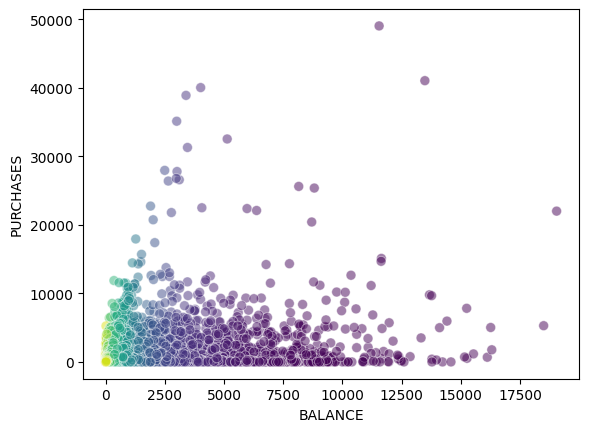

In [171]:
sns.scatterplot(data = newdata2, x = 'BALANCE', y = 'PURCHASES', c= ms.labels_.astype(float), s=50, alpha=0.5)


<Axes: xlabel='BALANCE', ylabel='BALANCE_FREQUENCY'>

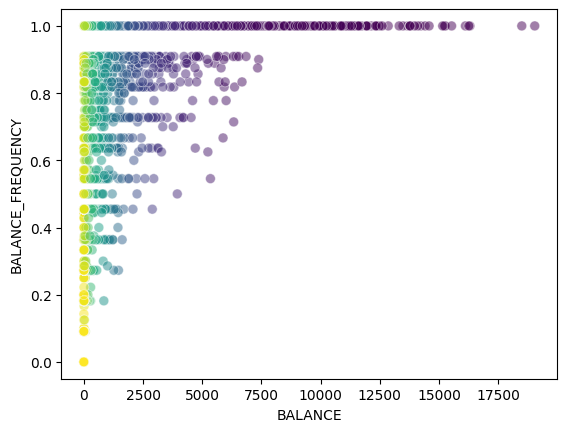

In [172]:
sns.scatterplot(data = newdata2, x = 'BALANCE', y = 'BALANCE_FREQUENCY', c= ms.labels_.astype(float), s=50, alpha=0.5)


<Axes: xlabel='BALANCE', ylabel='INSTALLMENTS_PURCHASES'>

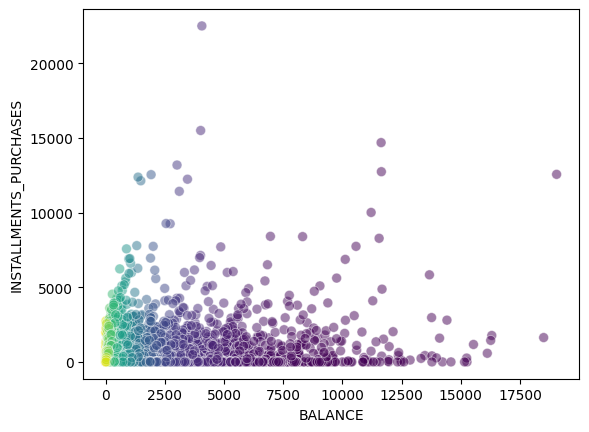

In [173]:
sns.scatterplot(data = newdata2, x = 'BALANCE', y = 'INSTALLMENTS_PURCHASES', c= ms.labels_.astype(float), s=50, alpha=0.5)


<Axes: xlabel='BALANCE', ylabel='CASH_ADVANCE'>

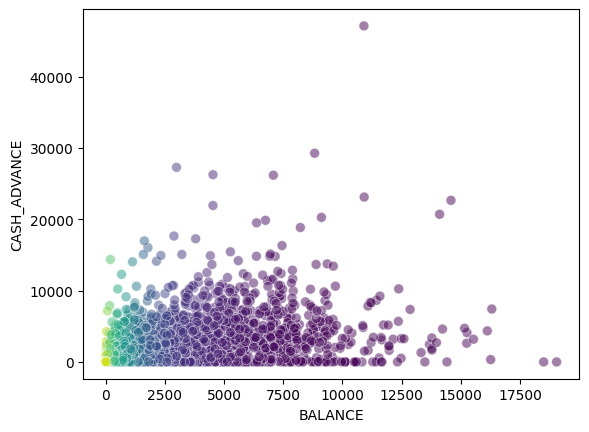

In [179]:
sns.scatterplot(data = newdata2, x = 'BALANCE', y = 'CASH_ADVANCE', c= ms.labels_.astype(float), s=50, alpha=0.5)


<Axes: xlabel='INSTALLMENTS_PURCHASES', ylabel='PURCHASES'>

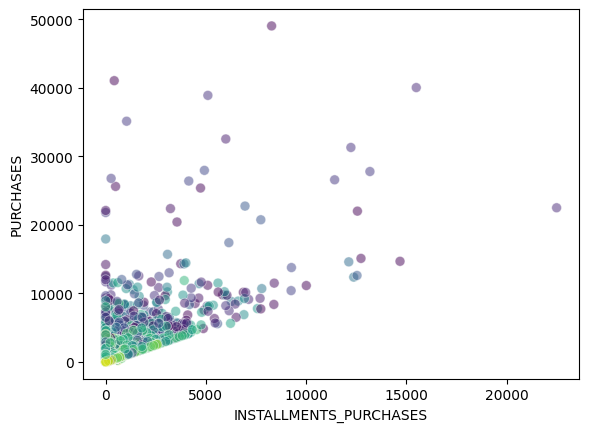

In [175]:
sns.scatterplot(data = newdata2, x = 'INSTALLMENTS_PURCHASES', y = 'PURCHASES', c= ms.labels_.astype(float), s=50, alpha=0.5)


<Axes: xlabel='BALANCE', ylabel='CREDIT_LIMIT'>

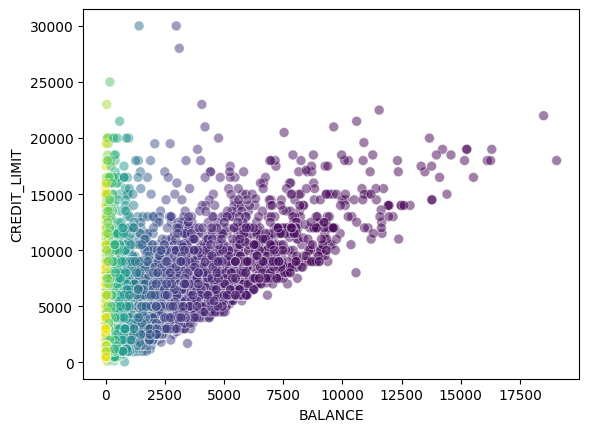

In [176]:
sns.scatterplot(data = newdata2, x = 'BALANCE', y = 'CREDIT_LIMIT', c= ms.labels_.astype(float), s=50, alpha=0.5)


<Axes: xlabel='BALANCE', ylabel='MINIMUM_PAYMENTS'>

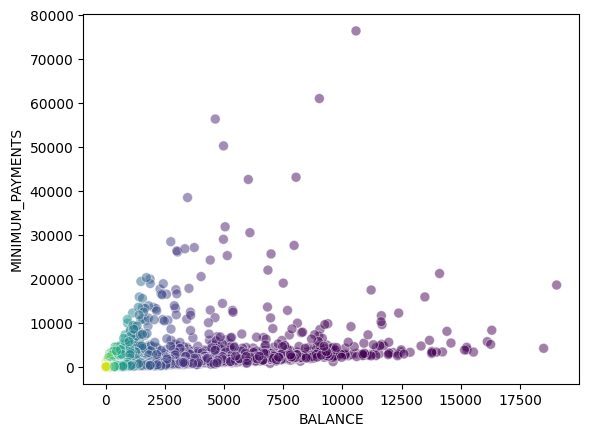

In [177]:
sns.scatterplot(data = newdata2, x = 'BALANCE', y = 'MINIMUM_PAYMENTS', c= ms.labels_.astype(float), s=50, alpha=0.5)


<Axes: xlabel='BALANCE', ylabel='PRC_FULL_PAYMENT'>

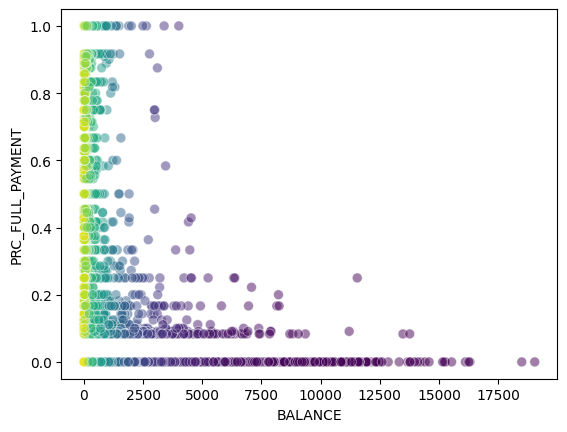

In [178]:
sns.scatterplot(data = newdata2, x = 'BALANCE', y = 'PRC_FULL_PAYMENT', c= ms.labels_.astype(float), s=50, alpha=0.5)


In order to classify the custumers, I used 3 different algorithms to made clusters.  
The first is K-means. The Elbow curve assist me to identifiy the best k which is also the optimun cluster number, and I select k = 2, and made 2 clusters by k-means. Through Silhouette Score Curve, we can also know that when cluster equals to 2, it will have the highest but appropriate Silhouette Score around 0.51. 
The second and third methods I choose is Affinity Propagation and Mean Shift. The result of this two algorithms are way more worse than K-means, they only have Silhouette Score around 0.2, and we cannot identify notable pattern through the plots.
Thus, I will select K-means as the final model.

# Interpreting Clusters

For K-means, it’s easy to mention that the purchases and balance have a somewhat positive correlation as shown in the matrix previously. We can notice people have higher balances and higher purchase amounts clustered together, and the bottom left corner cluster is for those people who have low balances and low purchase amounts.  
There is no notable trend in the clusters for balance frequency. But people have high installment and balance clustered together. The trend is also very explicit for users with high cash advances, and high credit limits.  
If we compare installment purchases and total purchases, people have more installment purchases and total purchases clustered as a group.  
These are the features that have significant affect in distinguish the two clusters.  


# Actionable Insights

For those people who have high spending power, provide these high-spending customers with premium services, loyalty programs, or exclusive offers. They may also be potential candidates for upselling or cross-selling higher-tier products.  
Initiate programs or incentives to increase low balances and low purchases Group usage of the card. Offering small rewards or cashback incentives for incremental spending might motivate this group to increase their balances and purchase amounts.  
For high cash advances and high credit limits people, this group might be leveraging their credit for cash needs. Offering them lower interest rates on cash advances or providing them with financial management tools might be beneficial. Ensure they are aware of all the fees associated with cash advances to promote responsible borrowing.  
Furthermore, understanding and segmenting customer base allows for more personalized and effective engagement strategies. By targeting each group's unique behaviors and preferences, businesses can create tailored offers and services that cater to their needs, leading to increased customer satisfaction and retention.